In [1]:
import numpy as np
import matplotlib.pyplot as plt


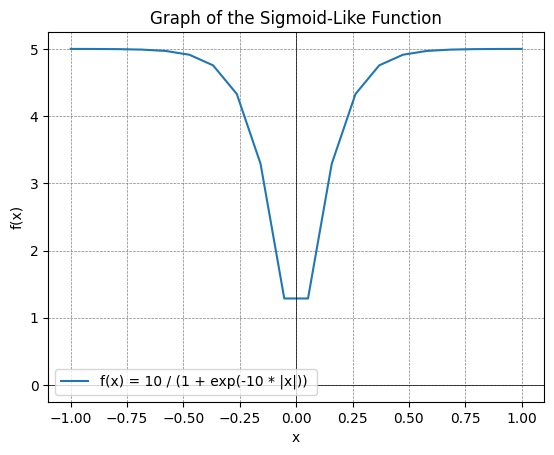

In [3]:

# Define the function
def f(x):
    return 10 / (1 + np.exp(-10 * np.abs(x))) -5

# Create x values
x = np.linspace(-1, 1, 20)
y = f(x)

# Plot the function
plt.plot(x, y, label='f(x) = 10 / (1 + exp(-10 * |x|)) ')
plt.title('Graph of the Sigmoid-Like Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

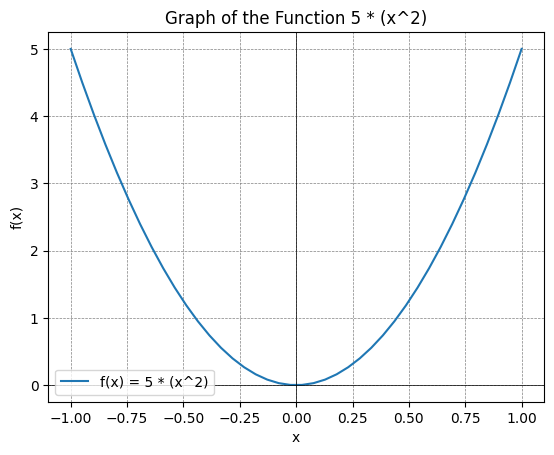

In [4]:
# Define the function
def f(x):
    return 5 * (x ** 2)

# Create x values
x = np.linspace(-1, 1, 40)
y = f(x)

# Plot the function
plt.plot(x, y, label='f(x) = 5 * (x^2)')
plt.title('Graph of the Function 5 * (x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

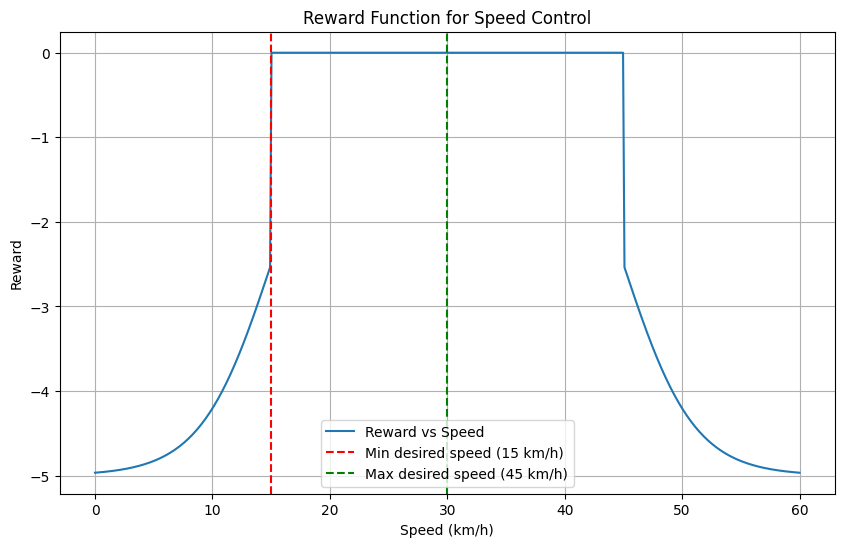

In [9]:

# Constants
k = 20
# Speed range normalized
speeds = np.linspace(0, 1, 500)

# Calculate rewards
rewards = []
for speed in speeds:
    reward = 0  # Initialize reward
    # Reward for the desired speed range
    if 0.25 <= speed <= 0.75:
        reward += 0.0

    # Penalty for underspeed
    elif speed < 0.25:
        reward += -5 / (1 + np.exp(-k * (0.25 - speed)))

    # Penalty for overspeed
    elif speed > 0.75:
        reward += -5 / (1 + np.exp(-k * (speed - 0.75)))
    
    rewards.append(reward)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(speeds * 60, rewards, label="Reward vs Speed")  # Convert normalized speed back to original scale
plt.axvline(15, color='r', linestyle='--', label="Min desired speed (15 km/h)")
plt.axvline(30, color='g', linestyle='--', label="Max desired speed (45 km/h)")
plt.xlabel('Speed (km/h)')
plt.ylabel('Reward')
plt.title('Reward Function for Speed Control')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
def calculate_reward_gradual(traffic_light_state, distance, speed, traffic_weight):
    reward = 0
    traffic_light_state_numeric = {'RED': 1, 'YELLOW': 1, 'GREEN': 0}.get(traffic_light_state, 0)
    distance_normalized = np.clip(distance / 50.0, 0, 1)  # Normalize distance to [0, 1]

    if traffic_light_state_numeric == 1:  # RED or YELLOW light
        # Gradual penalty based on distance and speed
        penalty_factor = 1 - distance_normalized  # Closer distance, higher penalty
        reward -= traffic_weight * penalty_factor * speed ** 2  # Quadratic speed penalty
        
        # Gradual reward for stopping
        if speed < 0.1:
            reward += traffic_weight * (1 - penalty_factor) * 5  # Higher reward closer to the light

    elif traffic_light_state_numeric == 0:  # GREEN light
        # Gradual reward for smooth passing
        reward += traffic_weight * (1 - distance_normalized) * speed  # Reward scales with distance and speed

    return reward

# Calculate rewards for each state and distance with the updated function
rewards_gradual = {state: [] for state in traffic_light_states}
for state in traffic_light_states:
    for speed in speeds:
        rewards_gradual[state].append([calculate_reward_gradual(state, d, speed, traffic_weight) for d in traffic_light_distance])

# Plot the graph
plt.figure(figsize=(16, 10))
for i, state in enumerate(traffic_light_states):
    plt.subplot(2, 2, i + 1)
    for j, speed in enumerate(speeds):
        plt.plot(traffic_light_distance, rewards_gradual[state][j], label=f"Speed={speed:.1f}")
    plt.title(f"Gradual Reward vs Distance ({state})")
    plt.xlabel("Distance to Traffic Light (m)")
    plt.ylabel("Reward")
    plt.axvline(10, color='gray', linestyle='--', alpha=0.5, label="Critical Distance (10m)")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

NameError: name 'traffic_light_states' is not defined